# AI AGENT

-  AIMessage, HumanMessage => Data types in LangChain

In [12]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_groq import ChatGroq

from langgraph.graph import StateGraph

from typing import TypedDict, List, Union
from dotenv import load_dotenv
import os

load_dotenv()

True

In [4]:
class AgentState(TypedDict):
    messages: List[Union[AIMessage, HumanMessage]]

In [10]:
llm = ChatGroq(model="deepseek-r1-distill-llama-70b", api_key=os.getenv('GROQ_API_KEY'))

In [ ]:
def process(state: AgentState) -> AgentState:
    '''This node will solve the request you input'''
    response = llm.invoke(state['messages'])

    state['messages'].append(AIMessage(content=response.content))

    print(f"\nAI: {response.content}")
    #print("CURRENT STATE: ", state["messages"])

    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node('llm', process)
graph.set_entry_point('llm')
graph.set_finish_point('llm')

app = graph.compile()

In [18]:
user_input = input('Enter: ')
conversation_memory = []

while user_input != 'exit':
    conversation_memory.append(HumanMessage(content=user_input))

    print('INPUT:', conversation_memory)

    result = app.invoke({'messages': conversation_memory})

    conversation_memory = result['messages']

    user_input = input('Enter: ')

INPUT: [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={})]

AI: <think>

</think>

Hello! How can I assist you today? 😊
CURRENT STATE:  [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={})]
INPUT: [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={}), HumanMessage(content='I am El', additional_kwargs={}, response_metadata={})]

AI: <think>
Alright, the user just said, "I am El." That's pretty short. I should respond in a friendly and open manner. Maybe ask them how they're doing or if there's something specific they want to talk about. Keeping it simple and inviting should encourage them to share more.
</think>

Hello, El! How are you doing today? Is there something specific you'd 

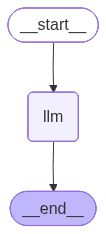

In [15]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))